In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [0]:
cd "/content/drive/My Drive/"

/content/drive/My Drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from scipy import ndimage
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

datagen = ImageDataGenerator(
    vertical_flip=True,
    horizontal_flip=True)


atypical=[]
for filename in glob.glob('./data/atypical/*.jpg'): 
    image =load_img(filename)
    image=img_to_array(image)
    image= expand_dims(image, 0)
    atypical.append(image)

save_here = './data/atypical/'
for new_image in atypical:
  datagen.fit(new_image)
  for x, val in zip(datagen.flow(new_image,                    
          save_to_dir=save_here,     
          save_prefix='aug',        
          save_format='jpg'),range(10)) :     
    pass



In [0]:
corn=[]
for filename in glob.glob('./data/corn/*.jpg'): 
    image =load_img(filename)
    image=img_to_array(image)
    image= expand_dims(image, 0)
    corn.append(image)


save_here = './data/corn/'
for new_image in corn:
  datagen.fit(new_image)
  for x, val in zip(datagen.flow(new_image,                    
          save_to_dir=save_here,     
          save_prefix='aug',        
          save_format='jpg'),range(10)) :  
     
    pass

In [0]:
eyelid=[]
for filename in glob.glob('./data/eyelid/*.jpg'): 
    image =load_img(filename)
    image=img_to_array(image)
    image= expand_dims(image, 0)
    eyelid.append(image)


save_here = './data/eyelid/'
for new_image in eyelid:
  datagen.fit(new_image)
  for x, val in zip(datagen.flow(new_image,                    
          save_to_dir=save_here,     
          save_prefix='aug',        
          save_format='jpg'),range(10)) :  
     
    pass

#datagen


---



#**new**


---



---



---



#Dataset loading

In [0]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "data"

# All the categories you want your neural network to detect
CATEGORIES = ["acne","atypical","corn","eyelid"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img))

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img))
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				print(e)
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

KeyboardInterrupt: ignored

#Machine Modelling

Train on 774 samples, validate on 87 samples
Epoch 1/100
774/774 [==============================] - 4s 5ms/sample - loss: 1.6866 - acc: 0.4690 - val_loss: 3.0670 - val_acc: 0.3333
Epoch 2/100
774/774 [==============================] - 1s 729us/sample - loss: 0.9060 - acc: 0.6770 - val_loss: 4.3748 - val_acc: 0.3333
Epoch 3/100
774/774 [==============================] - 1s 695us/sample - loss: 0.7020 - acc: 0.7455 - val_loss: 5.7921 - val_acc: 0.3333
Epoch 4/100
774/774 [==============================] - 0s 631us/sample - loss: 0.5739 - acc: 0.7894 - val_loss: 5.7960 - val_acc: 0.3333
Epoch 5/100
774/774 [==============================] - 0s 639us/sample - loss: 0.4100 - acc: 0.8682 - val_loss: 6.2438 - val_acc: 0.3333
Epoch 6/100
774/774 [==============================] - 1s 700us/sample - loss: 0.3202 - acc: 0.8889 - val_loss: 6.0527 - val_acc: 0.3333
Epoch 7/100
774/774 [==============================] - 1s 677us/sample - loss: 0.2800 - acc: 0.9096 - val_loss: 7.5053 - val_acc: 0.333

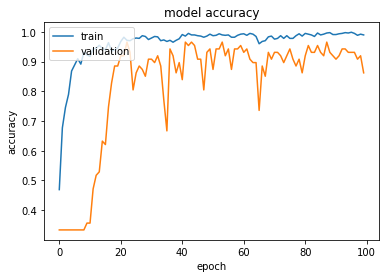

In [0]:

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

''''''
#conv
input_shape = X.shape[1:]
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
''''''
'''# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(4))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])'''

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=20, epochs=100, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [0]:
print(X.shape[1:])

(50, 50, 3)


In [0]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_31 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 64)       

#testing model

In [0]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

model = tf.keras.models.load_model('CNN.model')

model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

from keras.preprocessing import image
import keras
img = image.load_img('data/corno.jpg', target_size=(50, 50))
#print(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images)
print (classes)
y_proba = model.predict(images)
#y_classes = keras.np_utils.probas_to_classes(y_proba)
print(y_proba)
#print(y_classes)
for pred in classes:
	print("You have {} disease".format(CATEGORIES[pred]))

[1]
[[0. 1. 0. 0.]]
You have atypical disease
